In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_reviews.csv')

Text(0, 0.5, 'Count')

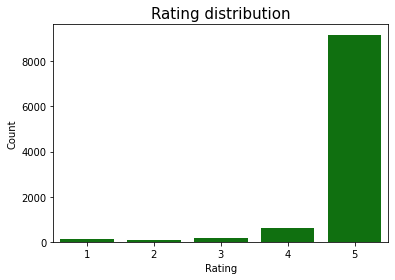

In [3]:
# Distribution of ratings

g = sns.countplot(x='rating', data=df, color='green')
g.set_title("Rating distribution", fontsize=15) # seting title and size of font
g.set_xlabel("Rating") # seting xlabel
g.set_ylabel("Count") # seting ylabel 

In [4]:
# average overall rating
df['rating'].mean()

4.8428839136009465

In [7]:
#Monthly average rating
df['date'] = pd.to_datetime(df['date'])
df['year/month'] = df['date'].dt.to_period('M')
avg_rating_pm = df.groupby('year/month')['rating'].mean()

C:\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


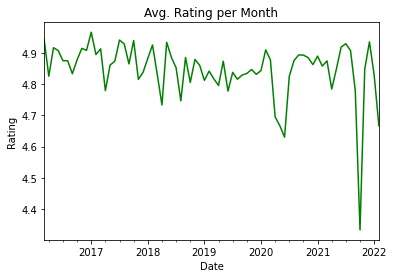

In [81]:
avg_rating_pm.plot.line(color='green', title = 'Avg. Rating per Month',ylabel = 'Rating',xlabel='Date')
plt.show()

In [5]:
# fill na values with NA text to run counter.
df['review'] = df['review'].fillna('NA')
df['review'] = df['review'].str.lower() 

In [42]:
#Stop words arent going to mean much so we can remove them

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['review(no_stopwords)'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['title(no_stopwords)'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['title_review(ns)'] = df['title(no_stopwords)'] + ' ' + df['review(no_stopwords)']



In [48]:
# remove punctuation
import string
df['title_review(ns)'] = df['title_review(ns)'].str.replace('[{}]'.format(string.punctuation), '')


C:\Users\tberv\AppData\Local\Temp\ipykernel_14056\297408662.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title_review(ns)'] = df['title_review(ns)'].str.replace('[{}]'.format(string.punctuation), '')


In [57]:
# remove na so it doesnt come up in our common words
df['title_review(ns)'] = df['title_review(ns)'].str.replace('na', '')


In [18]:
#most commonly used words per rating


rating_1 = df[df['rating']==1]
rating_2 = df[df['rating']==2]
rating_3 = df[df['rating']==3]
rating_4 = df[df['rating']==4]
rating_5 = df[df['rating']==5]

rating_list = [rating_1,rating_2,rating_3,rating_4,rating_5]

from collections import Counter
n=1
for rating in rating_list:
    common = Counter(" ".join(rating['title_review(ns)']).split()).most_common(10)
    print('Rating:',n,': \n', common, '\n')
    n +=1

Rating: 1 : 
 [('better', 49), ('order', 44), ('music', 38), ('would', 36), ('item', 35), ('online', 31), ('received', 30), ('told', 28), ('guitar', 26), ('days', 26)] 

Rating: 2 : 
 [('item', 33), ('days', 24), ('order', 23), ('delivery', 22), ('ordered', 21), ('express', 21), ('guitar', 20), ('stock', 19), ('service', 18), ('better', 18)] 

Rating: 3 : 
 [('product', 71), ('delivery', 67), ('would', 65), ('item', 64), ('order', 58), ('service', 54), ('good', 52), ('better', 46), ('stock', 44), ('ordered', 41)] 

Rating: 4 : 
 [('good', 264), ('service', 221), ('delivery', 216), ('great', 154), ('would', 137), ('product', 131), ('better', 112), ('order', 104), ('music', 95), ('arrived', 85)] 

Rating: 5 : 
 [('service', 3746), ('great', 3226), ('delivery', 2280), ('fast', 2068), ('good', 1840), ('better', 1793), ('Great', 1710), ('music', 1541), ('quick', 1321), ('na', 1231)] 



In [39]:
#single words arnt to informative so we can try find the most common bigrams


from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import bigrams
import itertools


In [74]:
# create a function to find common bigrams for given dataframe

def common_bigram(mydf,n): # n = top n amount of bigrams
    
    myTokens = [word_tokenize(Reviews) for Reviews in mydf]

    myTokens_noCase = [[word.lower() for word in Reviews if (len(Reviews)>1) and 
                                (len(word)>3)] for Reviews in myTokens]

    # Generate lists of bigrams
    myBigram = [list(bigrams(Reviews)) for Reviews in myTokens_noCase]



    # Put all lists together
    myBigramListNeg = list(itertools.chain.from_iterable(myBigram))


    # Get the most frequent ones
    bigramFreqNeg = FreqDist(myBigramListNeg)
    bigram = bigramFreqNeg.most_common(n)
    return bigram
                                    

In [95]:
# run function on all reviews
overall_bigram = common_bigram(df['title_review(ns)'], 50)
overall_bigram

[(('better', 'music'), 2081),
 (('great', 'service'), 1595),
 (('fast', 'delivery'), 1145),
 (('customer', 'service'), 973),
 (('excellent', 'service'), 766),
 (('quick', 'delivery'), 681),
 (('service', 'great'), 641),
 (('great', 'price'), 438),
 (('good', 'service'), 401),
 (('fast', 'shipping'), 376),
 (('great', 'product'), 364),
 (('good', 'price'), 340),
 (('prompt', 'delivery'), 318),
 (('service', 'fast'), 315),
 (('service', 'excellent'), 295),
 (('highly', 'recommend'), 292),
 (('great', 'customer'), 283),
 (('super', 'fast'), 266),
 (('delivery', 'great'), 255),
 (('great', 'communication'), 245),
 (('best', 'price'), 219),
 (('great', 'prices'), 209),
 (('deal', 'with'), 208),
 (('service', 'good'), 206),
 (('excellent', 'customer'), 206),
 (('highly', 'recommended'), 202),
 (('good', 'communication'), 197),
 (('prompt', 'service'), 196),
 (('fast', 'service'), 190),
 (('speedy', 'delivery'), 180),
 (('service', 'quick'), 178),
 (('well', 'packaged'), 177),
 (('great', 'ex

In [92]:
overall_bigram = pd.DataFrame(overall_bigram)
overall_bigram.to_csv('bigram.csv', index=False)

In [116]:
rating_list = [rating_1,rating_2,rating_3,rating_4,rating_5]
all_bigrams = pd.DataFrame()
n=1

for rating_df in rating_list:
    rating_bigram = pd.DataFrame(common_bigram(rating_df['title_review(ns)'],20))
    rating_bigram['rating'] = n
    rating_bigram = rating_bigram.rename(columns = {0:'bigram',1:'count'})
    all_bigrams = pd.concat([all_bigrams,rating_bigram])
    n += 1
    

In [118]:
all_bigrams.to_csv('bigram_by_rating.csv',index=False)